# Plotting with Pandas and Matplotlib

In [1]:
import pandas as pd

We use this new copy of the data set because for plotting, we need to have enough columns to do interesting things and explore trends in the data

In [2]:
safi = pd.read_csv('data/SAFI_full_shortname.csv')

In [3]:
safi.head()

,key_id,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


This is another notebook magic function, base python requires a `.show` command for eaach plot generated, but the magic lets us write the line below once for all of our plots in this notebook to be displayed

In [4]:
%matplotlib inline

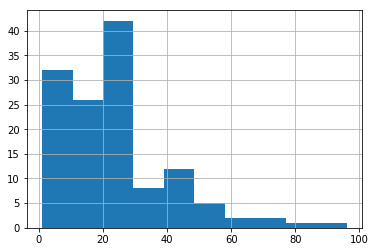

In [5]:
safi['years_liv'].hist()

We can change the number of bins

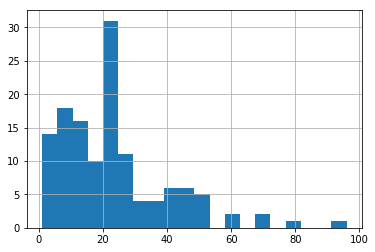

In [6]:
safi['years_liv'].hist(bins=20)

Like the `groupby` function we can make plots by grouping the data, however to do this, the hist function needs to get the whole dataset, not only one column, which is what happens when we use the `[]` to index and choose a column.  So, first we use the `columns` paramter instead of `[]` then we can add the `by` parameter to choose a grouping variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f181f4b5550>,
      dtype=object)

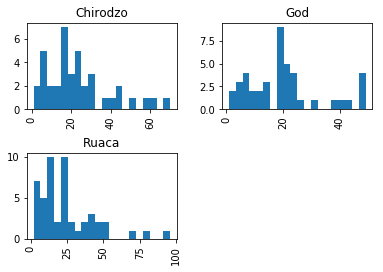

In [7]:
safi.hist(column='years_liv', bins=20,by='village')

These aren't well displayed for a pulication though, we might instead want to organize them in a single row to have less whitespace.  Recall we can check what parameters to ue with `shift`+`tab`+`tab`.  We note tha the `layout` parameter takes a tuple, which is a data type we saw on monday, which is multiple values tied together with `()`. The layout tuple is `(number_of_rows,number_of_columns)`. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f181f37ce48>,
      dtype=object)

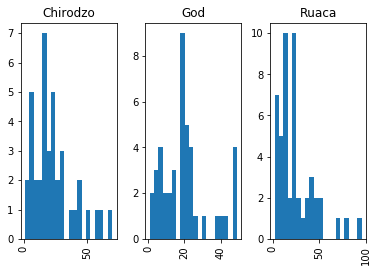

In [9]:
safi.hist(column='years_liv', bins=20,by='village',layout=(1,3))

We can also swap to a vertical aligment and the use the `sharex` and `sharey` parameters which accept booleans to make the subplots more easily comparable.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f181f182c88>,
      dtype=object)

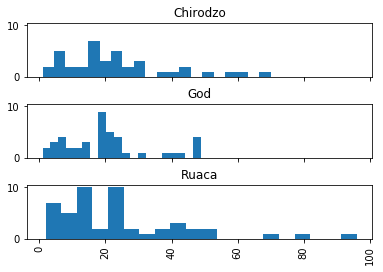

In [10]:
safi.hist(column='years_liv',bins=20,by='village',
          layout=(3,1),sharex=True,sharey=True)

# Scatter plot

scatter plots require two multi-valud numbers.  We can also control the total figure size with figsize. 

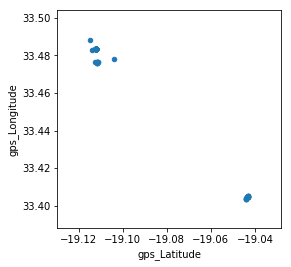

In [11]:
safi.plot.scatter(x='gps_Latitude',y='gps_Longitude',figsize=(4,4))

## Exercise

1. Make a scatter plot of `years_farm` vs `years_liv` and color the points based on `buildings_in_compound`

2. make a histogram of the number of rooms by wall type

hint: `shift` + `tab` to see options for the scatter plot function
press `tab` an extra time for more details

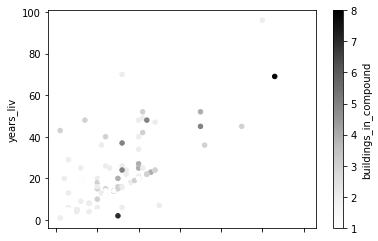

In [12]:
safi.plot.scatter(x='years_farm',y='years_liv',c='buildings_in_compound')

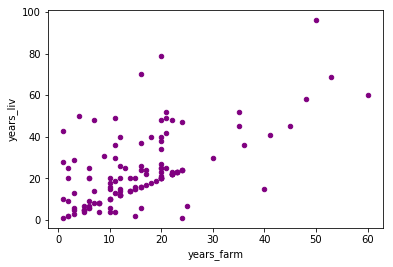

In [13]:
safi.plot.scatter(x='years_farm',y='years_liv',c='purple')

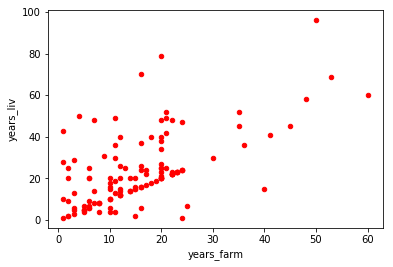

In [14]:
safi.plot.scatter(x='years_farm',y='years_liv',c='red')

Many people discovered that the `c` parameter can change the points to grayscale or all to one color, but not, by itself make them colorful and all different.  The `colormap` parameter provides that. For a reference on the colormaps and to choose ne see the [matplotlib colormap reference](https://matplotlib.org/examples/color/colormaps_reference.html)

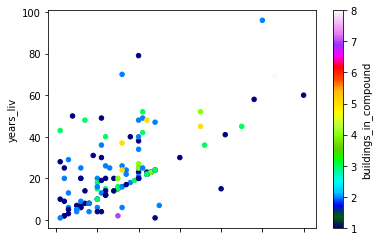

In [15]:
safi.plot.scatter(x='years_farm',y='years_liv',c='buildings_in_compound',
                 colormap='gist_ncar');

# Matplotlib

To contorl details, we need the matplotli library imported directly, we cannot use it only through pandas.  

In [16]:
import matplotlib.pyplot as plt

We might want to save figures also, which we can do by right clicking or with the command below.  First we keep our project organized by creating a figures folder, then we run the below.

Text(0,0.5,'years living')

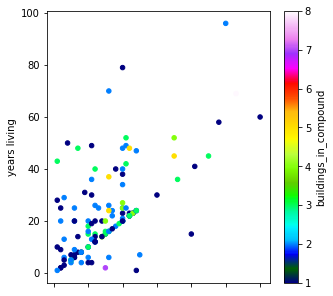

In [18]:

safi.plot.scatter(x='years_farm',y='years_liv',c='buildings_in_compound',
                 colormap='gist_ncar',figsize=(5,5));
plt.xlabel('years farmin')
plt.ylabel('years living')
plt.savefig('figures/years_scatter.png')

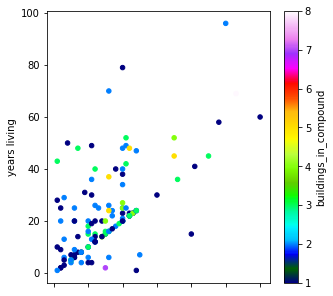

In [20]:

safi.plot.scatter(x='years_farm',y='years_liv',c='buildings_in_compound',
                 colormap='gist_ncar',figsize=(5,5));
plt.xlabel('years farmin')
plt.ylabel('years living')
plt.savefig('figures/years_scatter_notight.pdf')

Exercise 2:

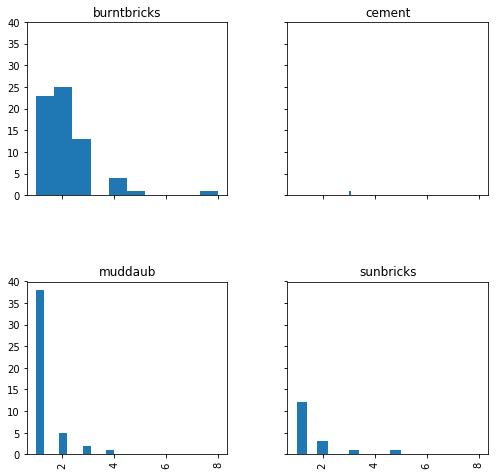

In [21]:
safi.hist(column='rooms',by='respondent_wall_type',
          sharex=True,sharey=True,figsize=(8,8));
#semicolon hides explanation

Seaborn is another python library.  It has more advanced statistical plotting, for example the regresion plot below. They have a [tutorial](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial) and excellent [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) on this.

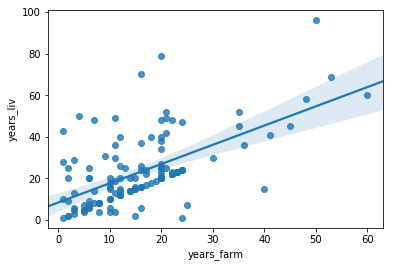

In [22]:
import seaborn as sns

sns.regplot(x='years_farm',y='years_liv',data=safi)

There's also `lmplot` that does grouped regressions

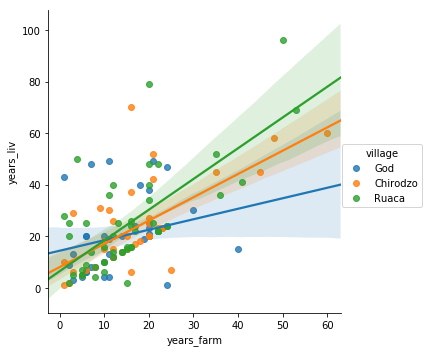

In [23]:
sns.lmplot(x='years_farm',y='years_liv',data=safi,hue='village')